In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("employe.csv")
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df["dept"].value_counts()

,count
dept,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


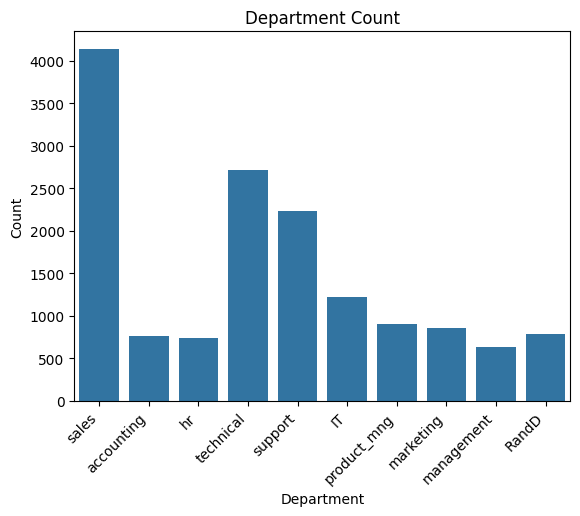

In [6]:
sns.countplot(x=df['dept'])
plt.title("Department Count")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

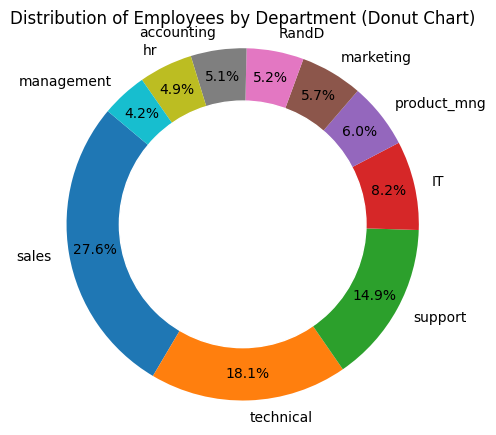

In [7]:
plt.figure(figsize=(5, 5))
dept_counts = df["dept"].value_counts()
labels = dept_counts.index
sizes = dept_counts.values
my_circle = plt.Circle((0, 0), 0.7, color='white')

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85)

# Add the circle to the plot
fig = plt.gcf()
fig.gca().add_artist(my_circle)

plt.title("Distribution of Employees by Department (Donut Chart)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

<Axes: >

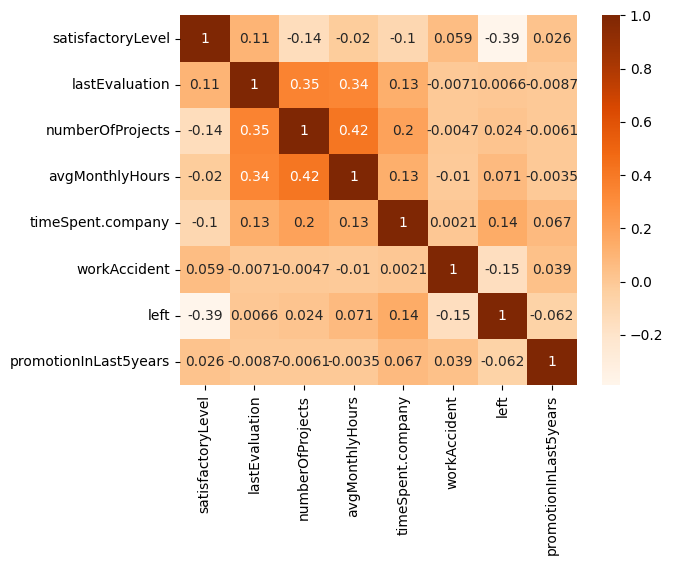

In [8]:
df1=df.drop(["dept","salary"],axis=1)
sns.heatmap(df1.corr(),annot=True,cmap="Oranges")

In [9]:
df['left'].value_counts()

,count
left,
0,11428
1,3571


/tmp/ipython-input-10-1707753170.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['left'], palette='viridis')


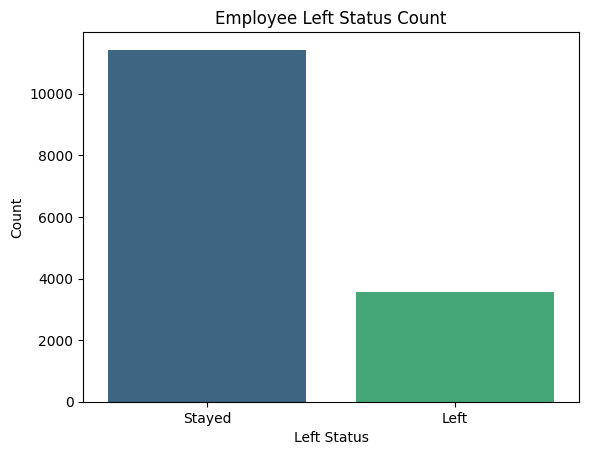

In [10]:
sns.countplot(x=df['left'], palette='viridis')
plt.title("Employee Left Status Count")
plt.xlabel("Left Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

In [11]:
print("Number of employees left and stayed in each department:")
print(df.groupby(['dept', 'left']).size().unstack(fill_value=0))

Number of employees left and stayed in each department:
left            0     1
dept                   
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


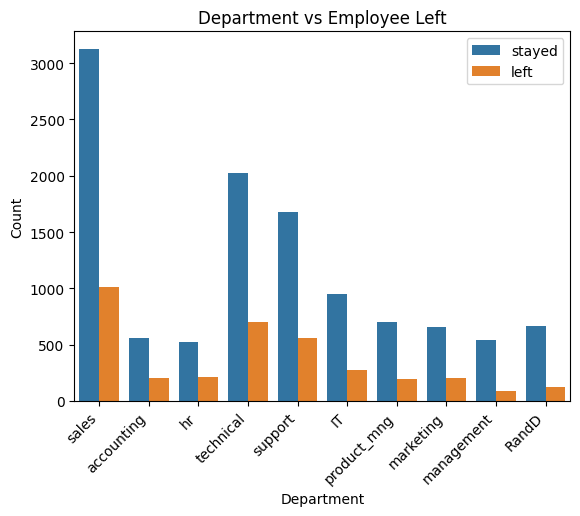

In [12]:
sns.countplot(x="dept",hue="left",data=df)
plt.title("Department vs Employee Left")
plt.xlabel("Department")
plt.xticks(rotation=45, ha='right')
plt.legend(["stayed","left"])
plt.ylabel("Count")
plt.show()

In [13]:
df.groupby('salary').size()

,0
salary,
high,1237
low,7316
medium,6446


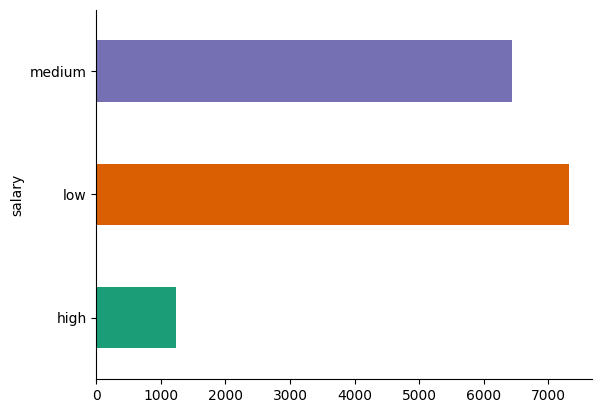

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('salary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [15]:

print("\nMean satisfaction level by salary group:")
print(df.groupby('salary')['satisfactoryLevel'].mean())


Mean satisfaction level by salary group:
salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfactoryLevel, dtype: float64


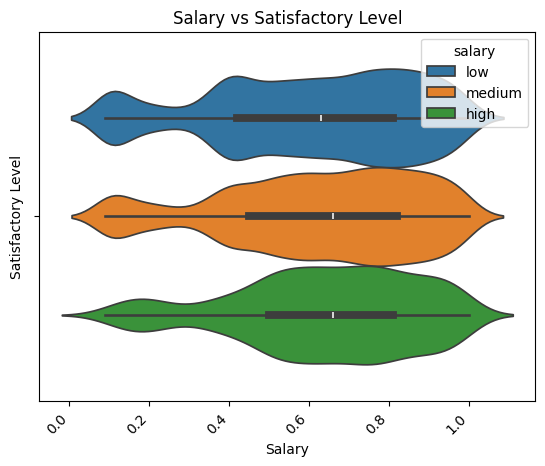

In [16]:
sns.violinplot(x="satisfactoryLevel",hue="salary",data=df)
plt.title("Salary vs Satisfactory Level")
plt.xlabel("Salary")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Satisfactory Level")
plt.show()

In [17]:
df.groupby("left")["satisfactoryLevel"].mean()

,satisfactoryLevel
left,
0,0.666810
1,0.440098


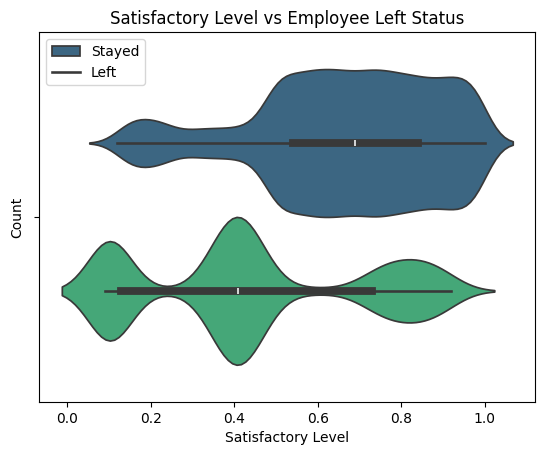

In [18]:
sns.violinplot(x="satisfactoryLevel", hue="left", data=df, palette='viridis')
plt.title("Satisfactory Level vs Employee Left Status")
plt.xlabel("Satisfactory Level")
plt.legend(["Stayed", "Left"])
plt.ylabel("Count")
plt.show()

In [19]:
df.groupby(["salary","left"]).size().unstack(fill_value=0)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


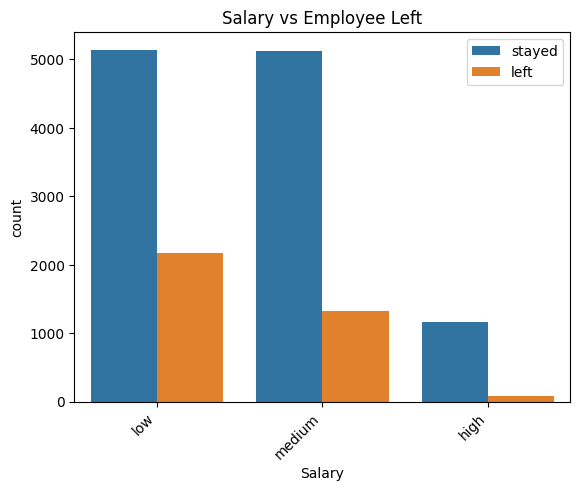

In [20]:
sns.countplot(x="salary",hue="left",data=df)
plt.title("Salary vs Employee Left")
plt.xlabel("Salary")
plt.xticks(rotation=45, ha='right')
plt.legend(["stayed","left"])
plt.show()

In [21]:
df.groupby(["numberOfProjects","left"]).size().unstack(fill_value=0)

left,0,1
numberOfProjects,,
2,821,1567
3,3983,72
4,3956,409
5,2149,612
6,519,655
7,0,256


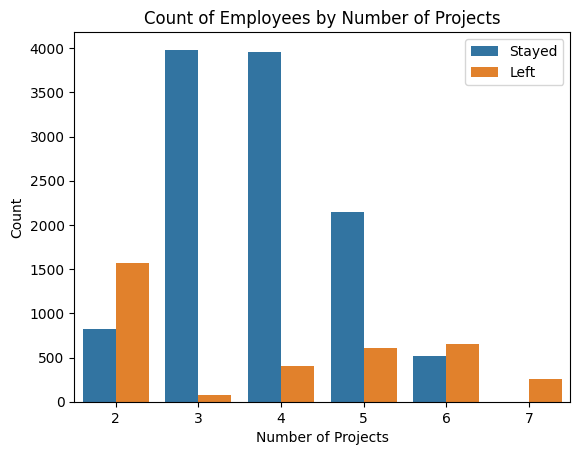

In [22]:
sns.countplot(x="numberOfProjects",hue="left",data=df)
plt.title("Count of Employees by Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(["Stayed","Left"])
plt.show()

In [23]:
# prompt: write code to show the relation between the Numberofprojects and salary and left attributes not graph in numbers concrete only on this attributes

print("\nRelation between Number of Projects, Salary, and Employee Left Status:")
print(df.groupby(['numberOfProjects', 'salary', 'left']).size().unstack(fill_value=0))


Relation between Number of Projects, Salary, and Employee Left Status:
left                        0    1
numberOfProjects salary           
2                high      94   46
                 low      378  966
                 medium   349  555
3                high     405    3
                 low     1754   37
                 medium  1824   32
4                high     366    2
                 low     1838  249
                 medium  1752  158
5                high     230   15
                 low      946  371
                 medium   973  226
6                high      60   13
                 low      228  405
                 medium   231  237
7                high       0    3
                 low        0  144
                 medium     0  109


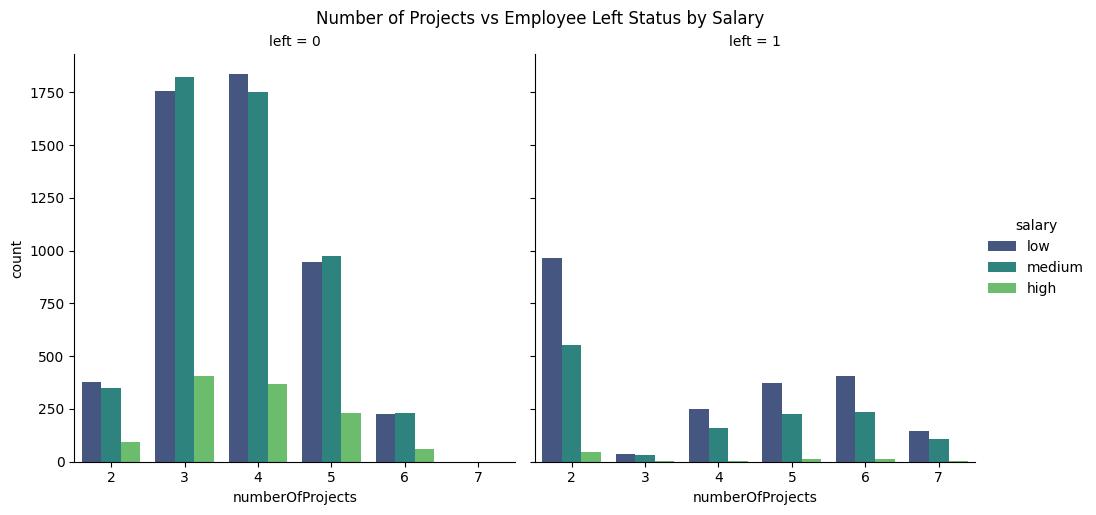

In [24]:
sns.catplot(x="numberOfProjects", col="left", hue="salary", data=df, kind="count", palette="viridis")
plt.suptitle("Number of Projects vs Employee Left Status by Salary", y=1.02)

plt.show()

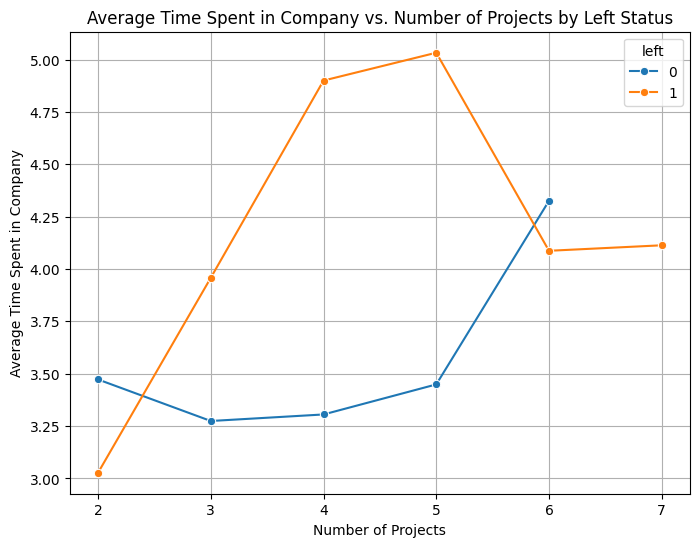

In [25]:
avg_time_left = df.groupby(['numberOfProjects', 'left'])['timeSpent.company'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='numberOfProjects', y='timeSpent.company', hue='left', data=avg_time_left, marker='o')
plt.title("Average Time Spent in Company vs. Number of Projects by Left Status")
plt.xlabel("Number of Projects")
plt.ylabel("Average Time Spent in Company")
plt.xticks(avg_time_left['numberOfProjects'].unique())
plt.grid(True)
plt.show()

In [26]:
print("Average Last Evaluation for employees who stayed and who left:")
print(df.groupby('left')['lastEvaluation'].mean())

Average Last Evaluation for employees who stayed and who left:
left
0    0.715473
1    0.718113
Name: lastEvaluation, dtype: float64


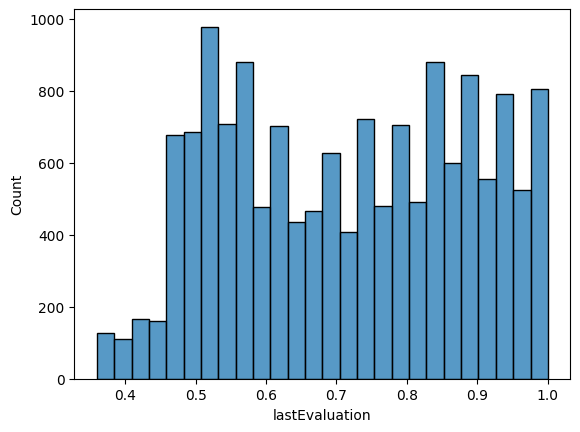

In [27]:
sns.histplot(x='lastEvaluation',data=df)
plt.savefig("lastEvaluation.png")
plt.show()

/tmp/ipython-input-28-3620738104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="left", y="lastEvaluation", data=df, palette='viridis')


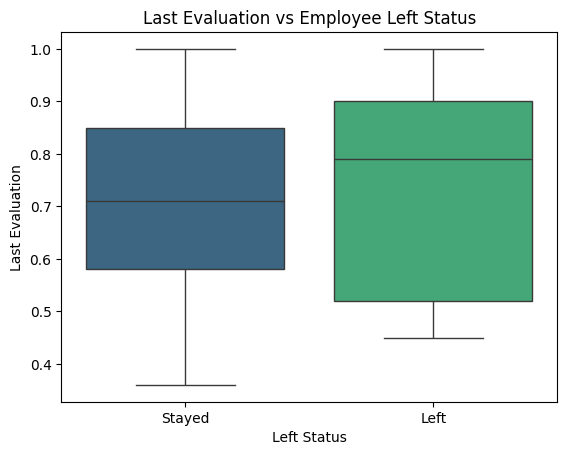

In [28]:
# prompt: plot a graph showing the relation between the lastEvaluation as left attribute

import matplotlib.pyplot as plt
sns.boxplot(x="left", y="lastEvaluation", data=df, palette='viridis')
plt.title("Last Evaluation vs Employee Left Status")
plt.xlabel("Left Status")
plt.ylabel("Last Evaluation")
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.savefig("lastEvaluationbox.png")
plt.show()

In [29]:
df.groupby(["promotionInLast5years","left"]).size().unstack(fill_value=0)

left,0,1
promotionInLast5years,,
0,11128,3552
1,300,19


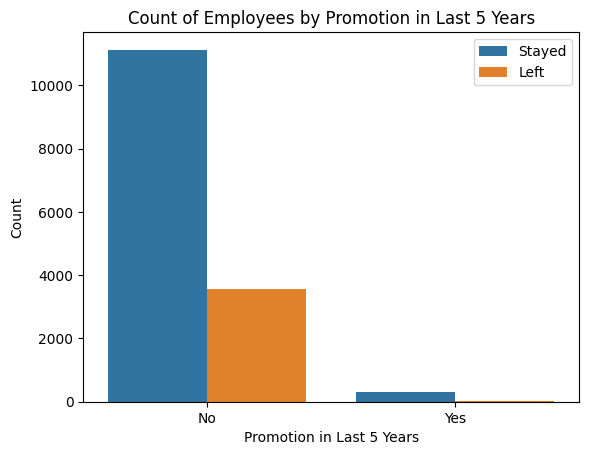

In [33]:
sns.countplot(x="promotionInLast5years",hue="left",data=df)
plt.title("Count of Employees by Promotion in Last 5 Years")
plt.xlabel("Promotion in Last 5 Years")
plt.ylabel("Count")
plt.legend(["Stayed","Left"])
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig("count_of_emp_prom.png")
plt.show()

In [31]:
df.groupby(["workAccident","left"]).size().unstack(fill_value=0)

left,0,1
workAccident,,
0,9428,3402
1,2000,169


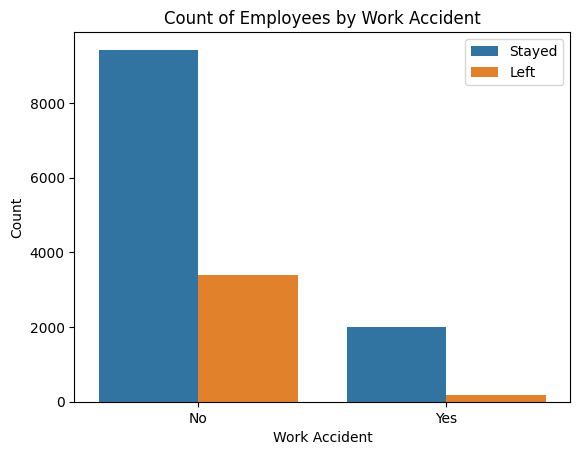

In [34]:
sns.countplot(x="workAccident",hue="left",data=df)
plt.title("Count of Employees by Work Accident")
plt.xlabel("Work Accident")
plt.ylabel("Count")
plt.legend(["Stayed","Left"])
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig("count_of_emp_work.png")
plt.show()